In [1]:
import numpy as np
from tensorflow.keras import layers,optimizers,models,datasets
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data=pd.read_csv("MNIST(Ass2&3)/mnist_train.csv")
test_data=pd.read_csv("MNIST(Ass2&3)/mnist_test.csv")

In [3]:
X_train=train_data.drop("label",axis=1).values

X_test=test_data.drop("label",axis=1).values

Y_train=train_data["label"].values
Y_test=test_data["label"].values
X_test.shape

(10000, 784)

In [4]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
model=models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [6]:
adm=optimizers.Adam(0.01)
epochs=2
model.compile(loss="sparse_categorical_crossentropy",optimizer=adm,metrics=["accuracy"])
tf=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=64)

Epoch 1/2


938/938 [==============================] - 28s 28ms/step - loss: 0.2315 - accuracy: 0.9263 - val_loss: 0.1122 - val_accuracy: 0.9635
Epoch 2/2
938/938 [==============================] - 27s 29ms/step - loss: 0.1124 - accuracy: 0.9648 - val_loss: 0.0919 - val_accuracy: 0.9740


In [7]:
predict=model.predict(X_test,batch_size=64)
print(classification_report(Y_test,predict.argmax(axis=1)))

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



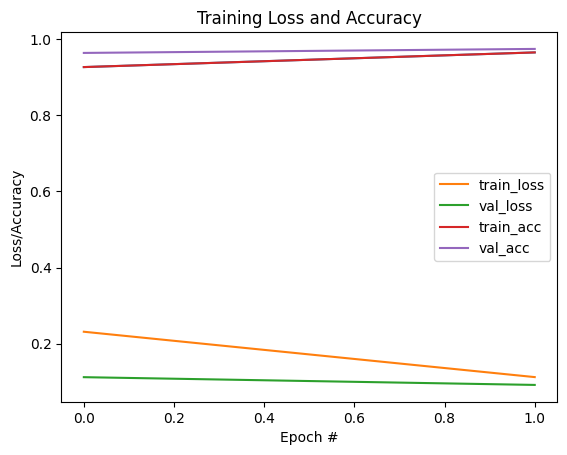

In [8]:
plt.plot(np.arange(0,epochs),tf.history["accuracy"])
plt.plot(np.arange(0, epochs), tf.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), tf.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), tf.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), tf.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()